<a href="https://colab.research.google.com/github/noor-prabh/emotion_detector/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_pickle("/content/drive/MyDrive/features.pkl")
print(df.head())

                                             feature  emotion
0  [-726.2172, 68.54142, 3.2933977, 12.2053, 5.51...  neutral
1  [-719.1283, 70.20157, 1.168397, 13.122541, 7.8...  neutral
2  [-714.9957, 69.68935, 3.9245636, 11.92419, 6.4...  neutral
3  [-710.9753, 67.56488, 5.7822413, 13.230726, 6....  neutral
4  [-759.92175, 75.78352, 6.0236053, 14.557394, 6...     calm


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
#extract features
X= np.array(df["feature"].tolist())
Y= np.array(df["emotion"].tolist())

#encoding emotion labels
le = LabelEncoder()
y_encoded = le.fit_transform(Y)
y_categorical = to_categorical(y_encoded)

print("x shape", X.shape)
print("y shape", y_categorical.shape)

x shape (1440, 40)
y shape (1440, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
#computing class weights for imbalanced classes
y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_integers),
    y=y_integers)
class_weights = dict(enumerate(class_weights))

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(y_categorical.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1692 - loss: 2.0363 - val_accuracy: 0.2292 - val_loss: 1.8838
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2917 - loss: 1.8746 - val_accuracy: 0.3021 - val_loss: 1.7579
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3940 - loss: 1.6340 - val_accuracy: 0.4167 - val_loss: 1.6197
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4500 - loss: 1.5403 - val_accuracy: 0.4410 - val_loss: 1.5100
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5098 - loss: 1.3752 - val_accuracy: 0.4861 - val_loss: 1.4077
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5348 - loss: 1.2778 - val_accuracy: 0.5000 - val_loss: 1.4061
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5703 - loss: 1.1159 - val_accuracy: 0.5104 - val_loss: 1.3520
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6104 - loss: 1.0632 - val_accuracy: 0.5278 - v

In [ ]:
import matplotlib.pyplot as plt


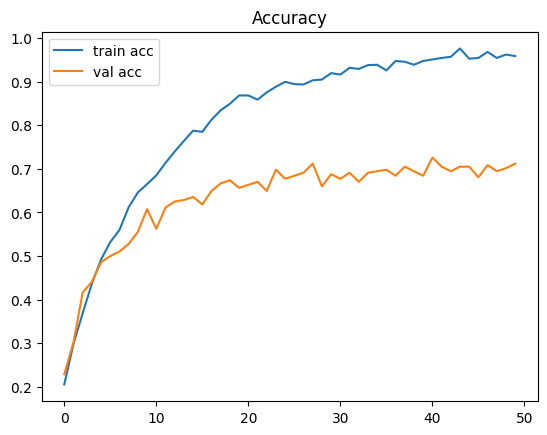

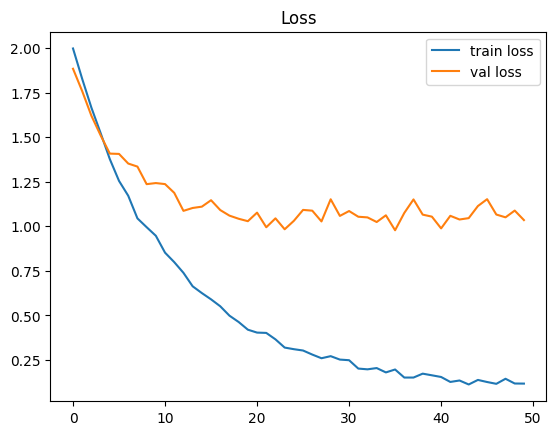

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


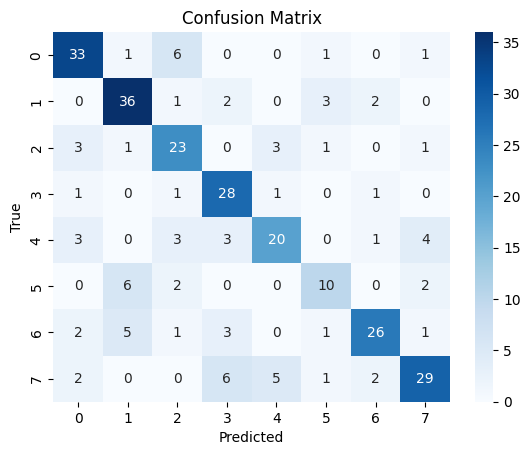

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.73      0.82      0.77        44
           2       0.62      0.72      0.67        32
           3       0.67      0.88      0.76        32
           4       0.69      0.59      0.63        34
           5       0.59      0.50      0.54        20
           6       0.81      0.67      0.73        39
           7       0.76      0.64      0.70        45

    accuracy                           0.71       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.72      0.71      0.71       288



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true_labels, y_pred_labels))

In [ ]:
import joblib
model.save("emotion_cnn_model.h5")
joblib.dump(le, "emotion_label_encoder.pkl")
joblib.dump(scaler, "emotion_scaler.pkl")


['emotion_scaler.pkl']